# SENTIMENT ANALYSIS

#### PERFORM SENTIMENT ANALYSIS ON TEXTUAL DATA USING NATURAL LANGUAGE PROCESSING (NLP) TECHNIQUES.

In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import numpy as sns 
import re
import pickle
import nltk

In [32]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
df = pd.read_csv('twitter_training.csv')
print (df)

       2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just realized that my Mac window partiti

In [34]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [35]:
df.columns = ['Id', 'Category', 'Target', 'Tweet']

In [36]:
df.head()

,Id,Category,Target,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [37]:
df.shape

(74681, 4)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        74681 non-null  int64 
 1   Category  74681 non-null  object
 2   Target    74681 non-null  object
 3   Tweet     73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [39]:
df.isnull().sum()

Id            0
Category      0
Target        0
Tweet       686
dtype: int64

In [40]:
# Drop rows with null values in the 'text' column
df= df.dropna(subset=['Tweet'])

# Reset the index after dropping rows
df = df.reset_index(drop=True)

# Display the updated DataFrame and the new shape
print(df.head())
print(f"Shape of data after dropping null values: {df.shape}")

     Id     Category    Target  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
Shape of data after dropping null values: (73995, 4)


In [41]:
df['Target'].value_counts()

Target
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

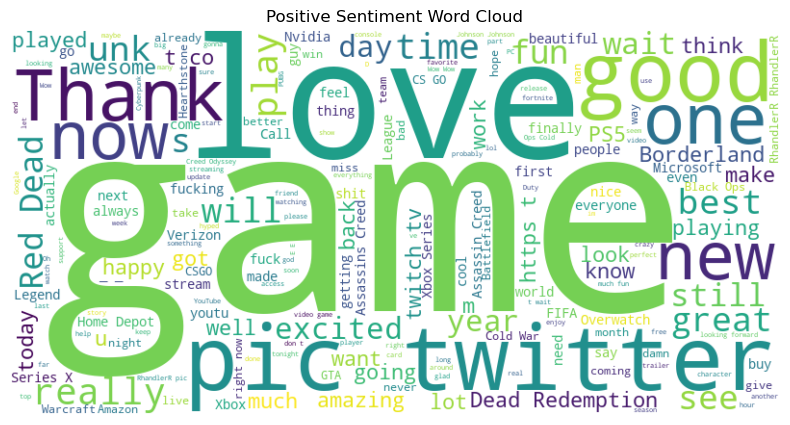

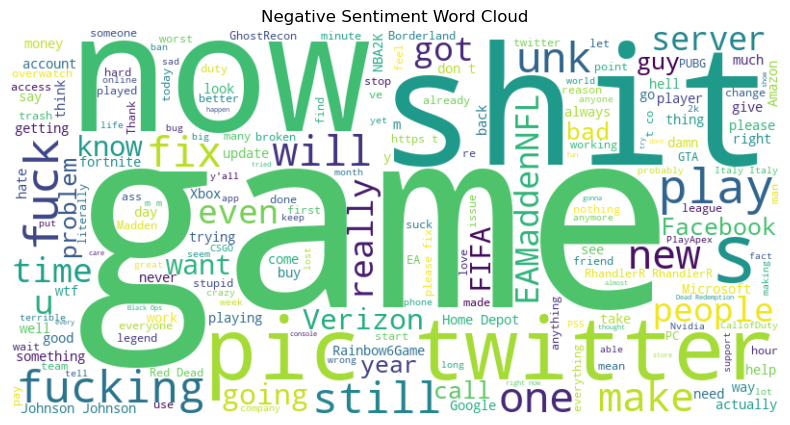

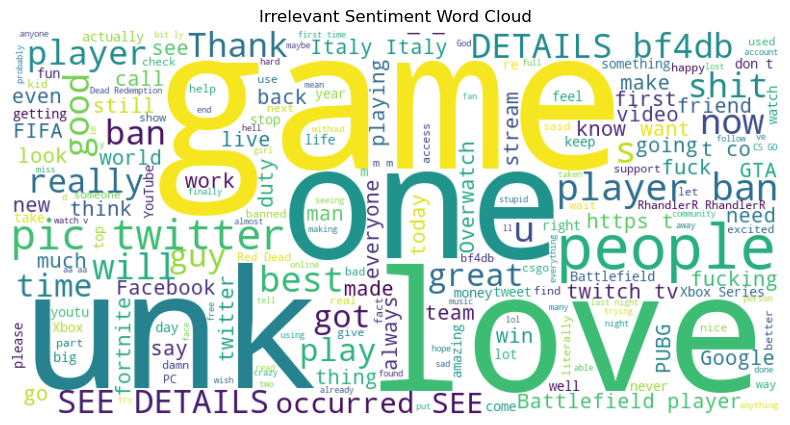

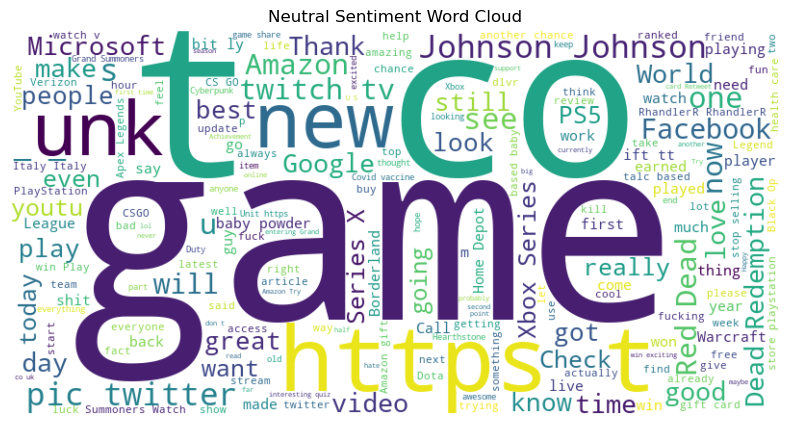

In [42]:
# Filter data based on sentiment categories
positive_tweets = df[df['Target'] == 'Positive']['Tweet']
negative_tweets = df[df['Target'] == 'Negative']['Tweet']
irrelevant_tweets = df[df['Target'] == 'Irrelevant']['Tweet']
neutral_tweets = df[df['Target'] == 'Neutral']['Tweet']

# Combine all tweets into a single string for each sentiment category
positive_text = " ".join(positive_tweets)
negative_text = " ".join(negative_tweets)
irrelevant_text = " ".join(irrelevant_tweets)
neutral_text = " ".join(neutral_tweets)

# Generate word clouds for each category
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Create word clouds for each sentiment
generate_wordcloud(positive_text, "Positive Sentiment Word Cloud")
generate_wordcloud(negative_text, "Negative Sentiment Word Cloud")
generate_wordcloud(irrelevant_text, "Irrelevant Sentiment Word Cloud")
generate_wordcloud(neutral_text, "Neutral Sentiment Word Cloud")


In [43]:
# Download the stopwords resource
nltk.download('stopwords')

# Get the list of stopwords for English
stop_words = stopwords.words('english')

# Print the list of stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
port_stem = PorterStemmer()
# Function to clean and stem text
def clean_text(text):
    if isinstance(text, float):  # Check if the text is NaN (float)
        text = " "  # Assign a space if NaN
    
    # Clean the text by removing non-alphabetical characters and converting to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    
    # Split the text into words
    words = text.split()
    
    # Remove stopwords and apply stemming
    words = [port_stem.stem(word) for word in words if word not in stop_words]
    
    # Join the words back into a string with spaces
    cleaned_text = ' '.join(words)
    
    
    return cleaned_text

# Example usage with a DataFrame (assuming df is your DataFrame with a 'Tweet' column)
df['Filter_Tweet'] = df['Tweet'].apply(clean_text)

In [45]:
#Splitting the data
X = df['Filter_Tweet'].values
Y = df['Target'].values
print(X)
print(Y)

['come border kill' 'im get borderland kill' 'im come borderland murder'
 ... 'realiz window partit mac year behind nvidia driver idea notic'
 'realiz window partit mac like year behind nvidia driver car fuck idea ever notic'
 'like window partit mac like year behind driver idea notic']
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2 , random_state=2)
print(X.shape , X_train.shape , X_test.shape)
# print(X_train)
print(X_test)

(73995,) (59196,) (14799,)
['odyssey murder creed'
 'offici microsoft surfac go price deal februari max griffith techradar secur rp zxk'
 'score horrif vision stormwind achiev' ...
 'csgo said someth coach still cheat oh noth els'
 'get lot red dead redeempt right game allow lot stupid thing gener idiot'
 'latest clip great song slumberjack jon ra']


In [47]:
# Converting the textual data into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer (don't fit again on test data)
X_test = vectorizer.transform(X_test)

# Print the transformed test data
print(X_train)
print(X_test)

  (0, 8813)	0.25726668792231316
  (0, 19727)	0.3283780166992309
  (0, 8043)	0.35286389926396267
  (0, 17149)	0.2329155783794114
  (0, 14077)	0.3626879710658127
  (0, 14698)	0.2690232090316522
  (0, 12746)	0.18314344224919218
  (0, 3133)	0.23634425676941287
  (0, 13803)	0.14473625688377156
  (0, 5849)	0.16891249706695935
  (0, 3315)	0.11338756610878972
  (0, 13346)	0.3818155287623135
  (0, 16978)	0.3818155287623135
  (1, 13803)	0.11326455704854185
  (1, 3315)	0.08873237934042712
  (1, 19203)	0.3985856493191863
  (1, 14821)	0.1477325678477612
  (1, 6846)	0.2651425971178981
  (1, 19194)	0.17075749419604397
  (1, 16035)	0.24177302233114997
  (1, 16184)	0.18227001570196694
  (1, 7768)	0.1886944229296642
  (1, 8423)	0.16083628788512616
  (1, 10698)	0.18566416861437465
  (1, 5672)	0.1536440282919227
  :	:
  (59194, 514)	0.1138752538645567
  (59194, 21257)	0.12621129715163854
  (59194, 14345)	0.1784916588606225
  (59194, 10362)	0.17241112403687076
  (59194, 7275)	0.2038865052331911
  (59194, 6

In [ ]:
# Training the Machine Learning Model 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

In [ ]:
# Accuracy Score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

# Accuracy Score on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

# Print the results with clearer labels
print(f"Accuracy Score on Training Data: {training_data_accuracy:.4f}")
print(f"Accuracy Score on Testing Data: {testing_data_accuracy:.4f}")

In [ ]:
#saving the trained model 
filename='trained_model.sav' 
pickle.dump(model,open(filename,'wb')) 
#using the saved model for future predictions 
#loading the saved model 
loaded_model = pickle.load(open('trained_model.sav', 'rb')) 
# Select a test sample for prediction 
X_new = X_test[200] 
Y_actual = Y_test[200] 
print("Actual Sentiment:", Y_actual) 
# Predict using the trained model 
prediction = loaded_model.predict(X_new) 
print("Predicted Sentiment:", prediction[0]) 
if prediction[0] == 'Negative': 
    print('Negative Tweet') 
elif prediction[0] == 'Positive': 
    print('Positive Tweet') 
else: 
    print('Neutral Tweet')